In [1]:
import sys
sys.path[0] = ('/home/labs/waic/omrik/DNN-Challenge')

In [2]:
from fastai.vision import *
from datasets import GlucoseData
from models import Linear
from wis_dnn_challenge import Predictor

In [3]:
root = Path('../data').resolve()
train = root / 'train'
val = root / 'val'

In [4]:
import pre
import resample

def normalize_time(series):
    # 1440 minutes in a day
    normalized = (series.hour * 60 + series.minute) / 1440
    return normalized

def get_data(data_dir):
    cgm, meals = pre.get_dfs(data_dir)
    meals = resample.resample_meals(cgm, meals, 15)
    meals = pd.concat((meals, cgm), axis=1)
    meals['time'] = normalize_time(meals.index.get_level_values('Date'))
    cgm, y = pre.build_cgm(cgm)
    return cgm, meals, y


In [19]:
cgm_t, meals_t, y_t = get_data(train)
cgm_t.head()

GlucoseValue  GlucoseValue -15min  \
id Date                                                     
46 2015-01-05 22:18:00      5.464080             5.099808   
   2015-01-05 22:33:00      5.828352             5.464080   
   2015-01-05 22:48:00      6.101556             5.828352   
   2015-01-05 23:03:00      6.101556             6.101556   
   2015-01-05 23:18:00      6.283692             6.101556   

                        GlucoseValue -30min  GlucoseValue -45min  \
id Date                                                            
46 2015-01-05 22:18:00             5.281944             5.828352   
   2015-01-05 22:33:00             5.099808             5.281944   
   2015-01-05 22:48:00             5.464080             5.099808   
   2015-01-05 23:03:00             5.828352             5.464080   
   2015-01-05 23:18:00             6.101556             5.828352   

                        GlucoseValue -60min  GlucoseValue -75min  \
id Date                                                            
46 2015-01-05 22:18:00             6.192624             6.465828   
   2015-01-05 22:33:00             5.828352             6.192624   
   2015-01-05 22:48:00             5.281944             5.828352   
   2015-01-05 23:03:00             5.099808             5.281944   
   2015-01-05 23:18:00             5.464080             5.099808   

                        GlucoseValue -90min  GlucoseValue -105min  \
id Date                                                             
46 2015-01-05 22:18:00             6.192624              5.646216   
   2015-01-05 22:33:00             6.465828              6.192624   
   2015-01-05 22:48:00             6.192624              6.465828   
   2015-01-05 23:03:00             5.828352              6.192624   
   2015-01-05 23:18:00             5.281944              5.828352   

                        GlucoseValue -120min  GlucoseValue -135min  ...  \
id Date                                                             ...   
46 2015-01-05 22:18:00              5.555148              5.828352  ...   
   2015-01-05 22:33:00              5.646216              5.555148  ...   
   2015-01-05 22:48:00              6.192624              5.646216  ...   
   2015-01-05 23:03:00              6.465828              6.192624  ...   
   2015-01-05 23:18:00              6.192624              6.465828  ...   

                        GlucoseValue -585min  GlucoseValue -600min  \
id Date                                                              
46 2015-01-05 22:18:00              9.744277              6.647964   
   2015-01-05 22:33:00             11.656705              9.744277   
   2015-01-05 22:48:00             11.929909             11.656705   
   2015-01-05 23:03:00             11.292433             11.929909   
   2015-01-05 23:18:00             10.381753             11.292433   

                        GlucoseValue -615min  GlucoseValue -630min  \
id Date                                                              
46 2015-01-05 22:18:00              5.646216              6.010488   
   2015-01-05 22:33:00              6.647964              5.646216   
   2015-01-05 22:48:00              9.744277              6.647964   
   2015-01-05 23:03:00             11.656705              9.744277   
   2015-01-05 23:18:00             11.929909             11.656705   

                        GlucoseValue -645min  GlucoseValue -660min  \
id Date                                                              
46 2015-01-05 22:18:00              6.283692              6.192624   
   2015-01-05 22:33:00              6.010488              6.283692   
   2015-01-05 22:48:00              5.646216              6.010488   
   2015-01-05 23:03:00              6.647964              5.646216   
   2015-01-05 23:18:00              9.744277              6.647964   

                        GlucoseValue -675min  GlucoseValue -690min  \
id Date                                                              
46 2015-01-05 22:18

In [21]:
meals_t.head()

weight  alanine_g  alcohol_g  arginine_g  caffeine_mg  \
id Date                                                                         
46 2015-01-05 10:18:00     0.0        0.0        0.0         0.0          0.0   
   2015-01-05 10:33:00     0.0        0.0        0.0         0.0          0.0   
   2015-01-05 10:48:00     0.0        0.0        0.0         0.0          0.0   
   2015-01-05 11:03:00     0.0        0.0        0.0         0.0          0.0   
   2015-01-05 11:18:00     0.0        0.0        0.0         0.0          0.0   

                        calcium_mg  carbohydrate_g  cholesterol_mg  \
id Date                                                              
46 2015-01-05 10:18:00         0.0             0.0             0.0   
   2015-01-05 10:33:00         0.0             0.0             0.0   
   2015-01-05 10:48:00         0.0             0.0             0.0   
   2015-01-05 11:03:00         0.0             0.0             0.0   
   2015-01-05 11:18:00         0.0             0.0             0.0   

                        energy_kcal  fructose_g  ...  \
id Date                                          ...   
46 2015-01-05 10:18:00          0.0         0.0  ...   
   2015-01-05 10:33:00          0.0         0.0  ...   
   2015-01-05 10:48:00          0.0         0.0  ...   
   2015-01-05 11:03:00          0.0         0.0  ...   
   2015-01-05 11:18:00          0.0         0.0  ...   

                        totalpolyunsaturatedfattyacids_g  \
id Date                                                    
46 2015-01-05 10:18:00                               0.0   
   2015-01-05 10:33:00                               0.0   
   2015-01-05 10:48:00                               0.0   
   2015-01-05 11:03:00                               0.0   
   2015-01-05 11:18:00                               0.0   

                        totalsaturatedfattyacids_g  totaltransfattyacids_g  \
id Date                                                                      
46 2015-01-05 10:18:00                         0.0                     0.0   
   2015-01-05 10:33:00                         0.0                     0.0   
   2015-01-05 10:48:00                         0.0                     0.0   
   2015-01-05 11:03:00                         0.0                     0.0   
   2015-01-05 11:18:00                         0.0                     0.0   

                        vitaminc_mg  vitamind_iu  vitamine_mg  water_g  \
id Date                                                                  
46 2015-01-05 10:18:00          0.0          0.0          0.0      0.0   
   2015-01-05 10:33:00          0.0          0.0          0.0      0.0   
   2015-01-05 10:48:00          0.0          0.0          0.0      0.0   
   2015-01-05 11:03:00          0.0          0.0          0.0      0.0   
   2015-01-05 11:18:00          0.0          0.0          0.0      0.0   

                        zinc_mg  GlucoseValue      time  
id Date                                                  
46 2015-01-05 10:18:00      0.0      6.647964  0.429167  
   2015-01-05 10:33:00      0.0      6.465828  0.439583  
   2015-01-05 10:48:00      0.0      6.101556  0.450000  
   2015-01-05 11:03:00      0.0      6.010488  0.460417  
   2015-01-05 11:18:00      0.0      6.192624  0.470833  

[5 rows x 38 columns]

In [5]:
train_data = get_data(train)
val_data = get_data(val)

/home/labs/waic/omrik/DNN-Challenge/pre.py:73: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  X = X.loc[y.index].dropna(how='any', axis=0)


In [6]:
class ContData(Dataset):
    def __init__(self, cgm, meals, y):
        self.cgm = cgm
        self.meals = meals
        self.y = y
        
    def __len__(self):
        return len(self.cgm)
    
    def __getitem__(self, i):
        index = self.meals.index.get_loc(self.cgm.index[i])
        values = self.meals[index-48:index].values
        target = self.y.iloc[i].values
        x, y = torch.tensor(values, dtype=torch.float), torch.tensor(target, dtype=torch.float)
        return x, y
    


In [7]:
train_ds = ContData(*train_data)
val_ds = ContData(*val_data)
data = DataBunch.create(train_ds, val_ds, bs=512)
data

DataBunch;

Train: <__main__.ContData object at 0x7fa48227eb38>;

Valid: <__main__.ContData object at 0x7fa4cdb8aa58>;

Test: None

In [9]:
def lin_layer(fi, fn, dp=0.5):
    return nn.Sequential(nn.Linear(fi, fn), nn.Dropout(dp), nn.ReLU(inplace=True))


def lin_dp_model(szs, dps):
    layers = []
    for fi, fn, dp in zip(szs[:-1], szs[1:], dps):
        layers.append(lin_layer(fi, fn, dp=dp))
    
    layers.append(Lambda(lambda x: x[:, None].expand(-1, 3, -1, -1)))
    layers.append(models.resnet18(pretrained=False, num_classes=8),)
    return nn.Sequential(*layers)

In [10]:
layers = [38, 32, 64, 64]
dps = [0, 0.5, 0.5]
model = lin_dp_model(layers, dps)
model

Sequential(
  (0): Sequential(
    (0): Linear(in_features=38, out_features=32, bias=True)
    (1): Dropout(p=0, inplace=False)
    (2): ReLU(inplace=True)
  )
  (1): Sequential(
    (0): Linear(in_features=32, out_features=64, bias=True)
    (1): Dropout(p=0.5, inplace=False)
    (2): ReLU(inplace=True)
  )
  (2): Sequential(
    (0): Linear(in_features=64, out_features=64, bias=True)
    (1): Dropout(p=0.5, inplace=False)
    (2): ReLU(inplace=True)
  )
  (3): Lambda()
  (4): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=

In [11]:
learner = Learner(data, model, loss_func=nn.MSELoss(), metrics=mean_absolute_error)

epoch,train_loss,valid_loss,mean_absolute_error,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.32E-06
Min loss divided by 10: 6.92E-05


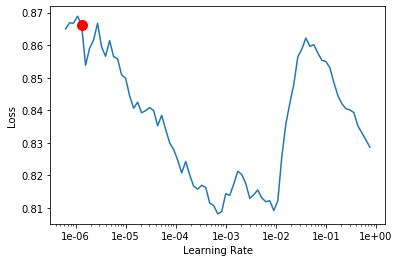

In [12]:
learner.lr_find()
learner.recorder.plot(suggestion=True)

In [13]:
learner.fit_one_cycle(5, 1e-4)

epoch,train_loss,valid_loss,mean_absolute_error,time
0,0.648167,0.744763,0.602826,02:21
1,0.559328,0.739318,0.658658,02:28
2,0.527224,0.899895,0.743169,02:21
3,0.521538,0.834384,0.706907,02:20
4,0.519219,0.892780,0.742031,02:21


In [111]:
layers = [
    Flatten(),
    *bn_drop_lin(1824, 1024, bn=False, actn=nn.ReLU(inplace=True)),
    *bn_drop_lin(1024, 512, p=.5, actn=nn.ReLU(inplace=True)),
    *bn_drop_lin(512, 256, p=.5, actn=nn.ReLU(inplace=True)),
    *bn_drop_lin(256, 128, p=.5, actn=nn.ReLU(inplace=True)),
    *bn_drop_lin(128, 64, p=.5, actn=nn.ReLU(inplace=True)),
    *bn_drop_lin(64, 32, p=.5, actn=nn.ReLU(inplace=True)),
    *bn_drop_lin(32, 8, p=.5),
]
model = nn.Sequential(*layers)
model

Sequential(
  (0): Flatten()
  (1): Linear(in_features=1824, out_features=1024, bias=True)
  (2): ReLU(inplace=True)
  (3): BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (4): Dropout(p=0.5, inplace=False)
  (5): Linear(in_features=1024, out_features=512, bias=True)
  (6): ReLU(inplace=True)
  (7): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (8): Dropout(p=0.5, inplace=False)
  (9): Linear(in_features=512, out_features=256, bias=True)
  (10): ReLU(inplace=True)
  (11): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (12): Dropout(p=0.5, inplace=False)
  (13): Linear(in_features=256, out_features=128, bias=True)
  (14): ReLU(inplace=True)
  (15): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (16): Dropout(p=0.5, inplace=False)
  (17): Linear(in_features=128, out_features=64, bias=True)
  (18): ReLU(inplace=True)
  (19): BatchNorm1d(64, eps=1

epoch,train_loss,valid_loss,mean_absolute_error,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 2.75E-02
Min loss divided by 10: 7.59E-02


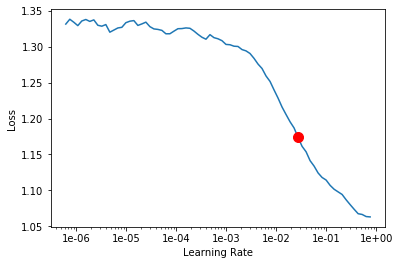

In [112]:
learner = Learner(data, model, loss_func=nn.MSELoss(), metrics=mean_absolute_error)
learner.lr_find()
learner.recorder.plot(suggestion=True)

In [113]:
learner.fit_one_cycle(20, 1e-3)

epoch,train_loss,valid_loss,mean_absolute_error,time
0,0.735390,0.550721,0.499580,02:26
1,0.529035,0.498991,0.467559,02:26
2,0.508263,0.482212,0.466449,02:26
3,0.509469,0.498857,0.469670,02:26
4,0.500923,0.479681,0.466432,02:25
5,0.502753,0.484564,0.483717,02:25
6,0.491180,0.467511,0.471229,02:25
7,0.494301,0.471292,0.465882,02:25
8,0.489723,0.472216,0.474079,02:25
9,0.488126,0.487606,0.466011,02:25


In [46]:
from fastai.vision.models.presnet import presnet18

In [96]:
38 * 49

1862